<a href="https://colab.research.google.com/github/brahm-gh/data_analysis_projects/blob/master/Car_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Car Sales

In this project i will be looking for features that best estimate the resale value of a car. the dataset is from kaggle: https://www.kaggle.com/gagandeep16/car-sales .

####Importing the libraries

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

####Importing the dataset

In [40]:
df = pd.read_csv('Car_sales.csv')
df.head(20)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.500,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.400,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.990,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
5,Audi,A6,18.780,23.555,Passenger,33.950,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105
6,Audi,A8,1.380,39.000,Passenger,62.000,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,2/27/2012,134.656858
7,BMW,323i,19.747,NaN,Passenger,26.990,2.5,170.0,107.3,68.4,176.0,3.179,16.6,26.0,6/28/2011,71.191207
8,BMW,328i,9.231,28.675,Passenger,33.400,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24.0,1/29/2012,81.877069
9,BMW,528i,17.527,36.125,Passenger,38.900,2.8,193.0,111.4,70.9,188.0,3.472,18.5,25.0,4/4/2011,83.998724


In [41]:
df.shape

(157, 16)

####Dropping missing values

In [42]:
df.dropna(axis=0, inplace = True)

In [43]:
df.shape

(117, 16)

####Fiding correlations between different features and the resale value

In [44]:
df.corr()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
Sales_in_thousands,1.000000,-0.275426,-0.251705,0.038111,-0.152538,0.406839,0.177802,0.272336,0.067184,0.138045,-0.066927,-0.175562
__year_resale_value,-0.275426,1.000000,0.954757,0.527187,0.773110,-0.053685,0.178128,0.025390,0.363274,0.324796,-0.398459,0.829511
Price_in_thousands,-0.251705,0.954757,1.000000,0.649170,0.853455,0.067042,0.301292,0.182592,0.511400,0.406496,-0.479539,0.905002
Engine_size,0.038111,0.527187,0.649170,1.000000,0.861618,0.410020,0.671756,0.537343,0.742831,0.616862,-0.724871,0.841005
Horsepower,-0.152538,0.773110,0.853455,0.861618,1.000000,0.225905,0.507275,0.400968,0.598603,0.479790,-0.595844,0.994071
Wheelbase,0.406839,-0.053685,0.067042,0.410020,0.225905,1.000000,0.675559,0.853669,0.675609,0.658654,-0.470455,0.200228
Width,0.177802,0.178128,0.301292,0.671756,0.507275,0.675559,1.000000,0.743226,0.735957,0.672191,-0.599604,0.478889
Length,0.272336,0.025390,0.182592,0.537343,0.400968,0.853669,0.743226,1.000000,0.684305,0.562504,-0.465682,0.366831
Curb_weight,0.067184,0.363274,0.511400,0.742831,0.598603,0.675609,0.735957,0.684305,1.000000,0.847994,-0.818819,0.597586
Fuel_capacity,0.138045,0.324796,0.406496,0.616862,0.479790,0.658654,0.672191,0.562504,0.847994,1.000000,-0.808506,0.478484


As expected there is a strong correlation between price and year resale value. But we also see a correlation between year resale value and engine size, horsepower and power performance factor.

####Splitting the data into independent variables and a dependent variable

In [45]:
X = df.iloc[:, [6,7,-1]].values
y = df.iloc[:, 3].values

In [46]:
print(X)

[[  1.8        140.          58.28014952]
 [  3.2        225.          91.37077766]
 [  3.5        210.          91.38977933]
 [  1.8        150.          62.7776392 ]
 [  2.8        200.          84.56510502]
 [  4.2        310.         134.6568582 ]
 [  2.8        193.          81.87706856]
 [  2.8        193.          83.9987238 ]
 [  3.1        175.          71.18145132]
 [  3.8        240.          95.63670253]
 [  3.8        205.          85.82840825]
 [  3.8        205.          84.25452581]
 [  4.6        275.         113.8545976 ]
 [  4.6        275.         113.7658739 ]
 [  3.         200.          83.48309358]
 [  2.2        115.          46.36334747]
 [  3.1        170.          67.31446216]
 [  3.1        175.          69.9913956 ]
 [  3.4        180.          72.03091719]
 [  3.8        200.          81.11854333]
 [  5.7        345.         141.14115   ]
 [  1.8        120.          48.2976361 ]
 [  1.          55.          23.27627233]
 [  2.5        163.          65.95

In [47]:
print(y)

[16.36  19.875 29.725 22.255 23.555 39.    28.675 36.125 12.475 13.74
 20.19  13.36  22.525 25.725 18.225  9.25  11.225 10.31  11.525 13.025
 36.225  9.125  5.16  12.36  14.18  13.725 12.64  17.325  7.75  12.545
 10.185 58.47  15.06  15.51  13.425 11.26  12.025  7.425 12.76   8.835
 10.055 14.21  16.64  13.175 23.575  7.85  15.075  9.85  13.21  17.71
 17.525 19.49   5.86   7.825  8.91  19.69  13.475 13.775 18.81  26.975
 32.075 40.375 20.525 21.725  8.325 10.395 10.595 16.575 20.94  19.125
 13.88   8.8   13.89  11.03  14.875 20.43  14.795 26.05  41.45  50.375
 58.6    8.45  11.295 15.125 15.38  17.81  11.24  19.89  19.925 15.24
  7.75   9.8   12.025 13.79  10.29  17.805 14.01  13.225 41.25  60.625
 67.55   9.2   10.59  10.79  10.025 13.245 18.14  15.445  9.575 13.325
 19.425 34.08  11.425 13.24  16.725 16.575 13.76 ]


In [48]:
y = y.reshape(len(y),1)

####Splitting the data into training set and testing set

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

####Visualisation of the correlation between the features and the dependent variable

Text(0, 0.5, 'Year Resale Value (k$)')

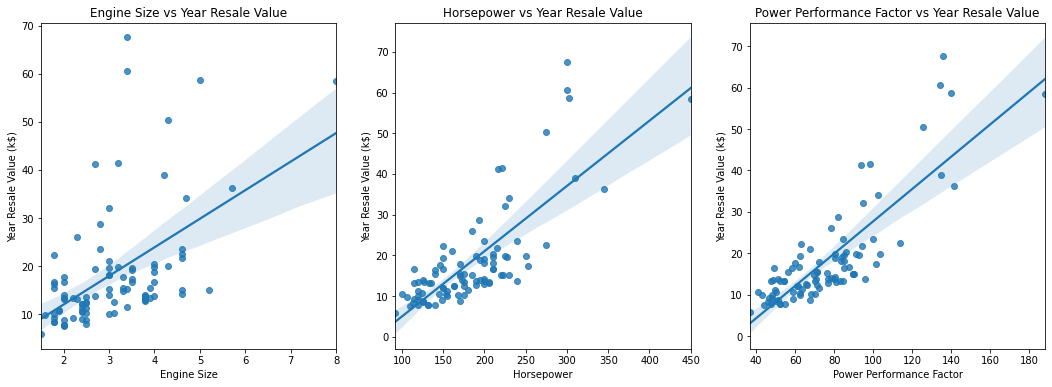

In [50]:
import seaborn as sns
plt.figure(figsize=(18,6))
ax1 = plt.subplot(1, 3, 1)
sns.regplot( x = X_train[:,0], y = y_train)
ax1.set_title('Engine Size vs Year Resale Value')
ax1.set_xlabel('Engine Size')
ax1.set_ylabel('Year Resale Value (k$)')
ax2 = plt.subplot(1, 3, 2)
sns.regplot( x = X_train[:,1], y = y_train)
ax2.set_title('Horsepower vs Year Resale Value')
ax2.set_xlabel('Horsepower')
ax2.set_ylabel('Year Resale Value (k$)')
ax3 = plt.subplot(1, 3, 3)
sns.regplot( x = X_train[:,2], y = y_train)
ax3.set_title('Power Performance Factor vs Year Resale Value')
ax3.set_xlabel('Power Performance Factor')
ax3.set_ylabel('Year Resale Value (k$)')

####Feature scaling

In [51]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.transform(y_test)

In [52]:
print(X_train)

[[-0.80078172 -0.85217339 -0.8202769 ]
 [ 0.7738898  -0.13956597 -0.17751258]
 [-0.52289851 -0.25833387 -0.30248443]
 [-0.52289851 -1.07274236 -1.03882234]
 [-0.70815398 -0.8182397  -0.82422146]
 [ 0.03286791 -0.13956597 -0.17574261]
 [ 0.68126206  0.36943933  0.26444884]
 [-0.61552625 -0.64857127 -0.65791265]
 [-0.98603719 -0.95397445 -0.91296753]
 [-1.17129266 -0.56373705 -0.49798277]
 [ 1.42228395  0.53910777  0.69761009]
 [-0.2450153   0.16583721  0.23437573]
 [-0.05975983 -0.37710178 -0.315213  ]
 [-0.52289851 -1.0897092  -1.08803242]
 [ 0.31075111  0.03010246  0.01272529]
 [-1.07866493 -1.41207922 -1.34453653]
 [ 0.21812338 -0.22440019 -0.13322222]
 [ 0.12549564  0.64090883  0.8621779 ]
 [ 0.21812338 -0.22440019 -0.17611789]
 [ 0.40337885  1.18384781  0.98026151]
 [ 0.31075111 -0.05473175 -0.14317025]
 [ 0.68126206  0.36943933  0.32553819]
 [-0.05975983  0.7087762   0.73552444]
 [-0.33764304  0.57304145  0.67764846]
 [-0.61552625 -0.59767074 -0.65210437]
 [-0.61552625 -0.56373705

In [53]:
print(y_train)

[[-0.41684644]
 [-0.23064584]
 [-0.66840222]
 [-0.39793865]
 [-0.41972371]
 [-0.48014642]
 [-0.4184906 ]
 [-0.63469704]
 [-0.41026982]
 [ 0.32384558]
 [ 0.28027546]
 [ 0.85161948]
 [ 0.21574236]
 [-0.86035737]
 [-0.25284194]
 [-0.63510807]
 [-0.04156796]
 [ 1.90182376]
 [-0.24133285]
 [-0.08143873]
 [-0.55824381]
 [-0.40739255]
 [ 1.1311259 ]
 [ 1.88538221]
 [-0.77321713]
 [-0.51713992]
 [ 0.09654109]
 [ 0.12819109]
 [-0.78225999]
 [-0.13775106]
 [-0.33751594]
 [ 0.43071569]
 [-0.74526649]
 [-0.65812625]
 [-1.02395084]
 [-0.67908923]
 [-0.45671721]
 [ 1.70041472]
 [-0.86241256]
 [-0.23598934]
 [ 0.1738164 ]
 [-0.16076923]
 [-0.40204904]
 [-0.86857815]
 [ 0.11298265]
 [-0.58002887]
 [-0.48960032]
 [ 3.30100004]
 [-0.28942439]
 [-0.37327632]
 [-0.86857815]
 [ 4.04744661]
 [-0.26763933]
 [ 3.47815779]
 [-0.00745174]
 [-0.3539575 ]
 [-0.43493215]
 [-0.47439188]
 [-0.04978874]
 [-0.5771516 ]
 [-0.13076339]
 [-0.14309456]
 [ 2.63552813]
 [ 0.06653526]
 [ 3.31168705]
 [ 1.47228816]
 [ 0.09119

####Training the data on the linear regression  model

In [54]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

####Measuring the performance of the model

In [55]:
lr_pred = lr.predict(X_test)

In [56]:
from sklearn.metrics import r2_score
r2_score(lr_pred, y_test)

0.9095790169667508

####Training the data on the polynomial regression model and evaluating it's preformance

In [57]:
from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree = 2)
X_train_poly = pr.fit_transform(X_train)
X_test_poly = pr.transform(X_test)
lr2 = LinearRegression()
lr2.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
pr_pred = lr2.predict(X_test_poly)
r2_score(pr_pred, y_test)

0.8384579499828174

####Training the data on the support vector regression model and evaluating it's performance

In [59]:
from sklearn.svm import SVR
reg = SVR(kernel = 'linear')
reg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [60]:
reg_pred = reg.predict(X_test)
r2_score(reg_pred, y_test)

0.7927586904885999

####Training the data on the decision tree regression model and evaluating it's performance

In [61]:
from sklearn.tree import DecisionTreeRegressor
reg2  = DecisionTreeRegressor()
reg2.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [62]:
reg2_pred = reg2.predict(X_test)
r2_score(reg2_pred, y_test)

0.7444613222123768

####Training the data on the random forest regression model and evaluating it's performance

In [63]:
from sklearn.ensemble import RandomForestRegressor
reg3 = RandomForestRegressor(n_estimators = 10)
reg3.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [64]:
reg3_pred = reg3.predict(X_test)
r2_score(reg3_pred, y_test)

0.6334810850143215

###Model Selection

The multiple linear regression model had by far the highest R² score of 0.9. we can conclude that it is the best model that fits our data.